In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import cfgrib
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile
import cartopy
from cartopy import crs as ccrs
from cartopy import feature as cfeature
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader

In [2]:
ds = xr.open_dataset('prate.01.2022071018.daily.grb2', decode_times=True, engine='cfgrib')

In [3]:
prec  = (ds.prate * 6 * 3600)

In [10]:


print(shapes)
print(estados)

Bacia_Grande
estados


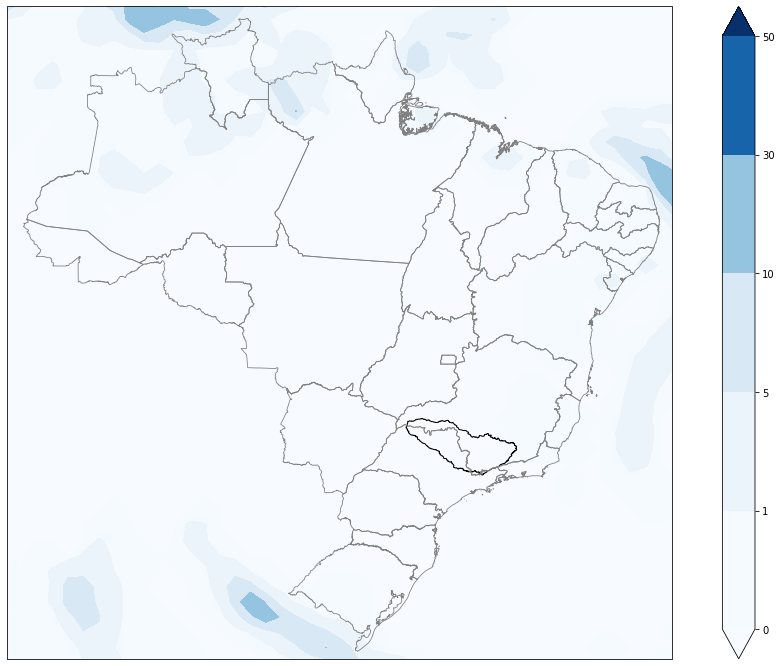

In [22]:
proj = ccrs.PlateCarree(central_longitude=0.0)
res = '110m' # Coarsest and quickest to display; other options are '10m' (slowest) and '50m'.

fig = plt.figure(figsize=(18,12))

ax = plt.subplot(1,1,1,projection=proj)

#lon e lat

ax.set_extent ([-75, -34, 6, -32.5])

#shape bacias e estados do Brasil
# voce pode alterar a cor do contorno do shape em 'edgecolor', 
#para destacar a bacia e deixar os estados mais suaves por exemplo


#shapes = 'C:\\Users\\joao.luiz\\Documents\\shapefiles_SMAP\\shapes_SMAP\\Bacia_Grande'
#estados = 'C:\\Users\\joao.luiz\\Documents\\shapefiles_SMAP\\estados'
shapes = 'BaciaGrande'
estado = 'estados'
shape_feature = ShapelyFeature(shpreader.Reader(shapes).geometries(),\
 ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.0)

shape_feature1 = ShapelyFeature(shpreader.Reader(estado).geometries(),\
 ccrs.PlateCarree(), facecolor='none', edgecolor='grey', linewidth=0.8)

ax.add_feature(shape_feature, zorder = 999)
ax.add_feature(shape_feature1, zorder = 999)


cf = ax.contourf(prec['longitude'], prec['latitude'], prec[1,:,:], transform=cartopy.crs.PlateCarree(), levels=[0,1,5,10, 30, 50], 
                 extend='both', cmap='Blues')

plt.colorbar(cf)

plt.savefig('BaciadoGrande.png')